In [1]:
from keras.datasets import mnist, fashion_mnist
from tensorflow import keras
from keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

# 손글씨 데이터 분류

- 데이터 불러오기

In [2]:
(X, y), (X_test, y_test) = mnist.load_data()

In [3]:
X.shape, y.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

##### 데이터 처리

데이터 분석을 위해 3차원 형태(28x28x60000)의 Input Data 형태를 2차원 형태(784x60000)의 형태로 바꿔준다.

In [5]:
X = X.reshape(60000,28*28)
X = X/255
X_test = X_test.reshape(10000,28*28)
X_test = X_test/255

0~9까지의 정수 데이터 값을 가지는 60000x1 행렬로 표현되어 있는 y를 각 데이터와 일치하게 60000x10로 바꿔준다 (Softmax 분석을 위한 필수과정)

In [6]:
y = to_categorical(y)
y_test = to_categorical(y_test)

분류 과정에서 train data에 overfitting을 방지할 수 있도록, 60000개의 데이터를 10000개의 검증 데이터와, 50000개의 트레이닝용 데이터로 나눈다

In [7]:
val_X = X[:10000]
partial_X = X[10000:]
val_y = y[:10000]
partial_y = y[10000:]

##### 데이터 분류

|문제 유형|	loss function	|activation function|
|:-----:|:-----:|:-----:|
|binary classification|	binary_crossentropy	|sigmoid|
|multi-class classification|	categorical_crossentropy|	softmax|
|regression	|MSE (mean squared error)|	-|

##### 표 1. 문제 유형에 따른 적합한 loss function과 activation function 
citation : https://github.com/bjmin/bmin_comphys/blob/master/ml/ml08/mlphys08-3.ipynb

데이터 분류의 목적이 0~9까지의 숫자 형태의 그림을 숫자로 분류하는 것이므로, multi-class classification에 해당한다. 따라서, 다음과 같은 loss와, activation을 이용한다
- loss function = categorical_crossentropy
- activation function = softmax

In [8]:
smx_1 = models.Sequential()
smx_1.add(layers.Dense(512, activation = 'relu',input_shape=(28*28,)))
smx_1.add(layers.Dense(512, activation = 'relu',input_shape=(28*28,)))
smx_1.add(layers.Dense(10, activation = 'softmax',input_shape=(28*28,)))
smx_1.compile(loss = 'categorical_crossentropy', optimizer ='nadam', metrics = ['accuracy'])

In [9]:
model_1 = smx_1.fit(partial_X,partial_y,epochs=20,batch_size = 128, validation_data=(val_X, val_y))

Epoch 1/20
391/391 [==============================] - 3s 6ms/step - loss: 0.4450 - accuracy: 0.8692 - val_loss: 0.1083 - val_accuracy: 0.9661
Epoch 2/20
391/391 [==============================] - 2s 4ms/step - loss: 0.0833 - accuracy: 0.9752 - val_loss: 0.1109 - val_accuracy: 0.9641
Epoch 3/20
391/391 [==============================] - 2s 4ms/step - loss: 0.0460 - accuracy: 0.9855 - val_loss: 0.0951 - val_accuracy: 0.9716
Epoch 4/20
391/391 [==============================] - 2s 4ms/step - loss: 0.0319 - accuracy: 0.9904 - val_loss: 0.0904 - val_accuracy: 0.9713
Epoch 5/20
391/391 [==============================] - 2s 4ms/step - loss: 0.0226 - accuracy: 0.9923 - val_loss: 0.0742 - val_accuracy: 0.9796
Epoch 6/20
391/391 [==============================] - 2s 4ms/step - loss: 0.0183 - accuracy: 0.9938 - val_loss: 0.0846 - val_accuracy: 0.9774
Epoch 7/20
391/391 [==============================] - 2s 5ms/step - loss: 0.0121 - accuracy: 0.9965 - val_loss: 0.1048 - val_accuracy: 0.9739
Epoch 

##### 정확도 확인

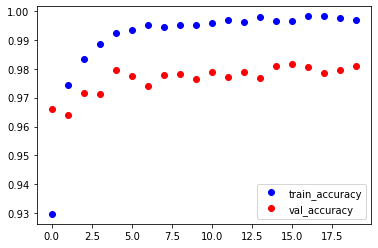

In [10]:
validation = model_1.history
accuracy = validation['accuracy']
val_accuracy = validation['val_accuracy']

x = np.arange(0,len(accuracy))
plt.plot(x,accuracy,'bo',label='train_accuracy')
plt.plot(x,val_accuracy,'ro',label='val_accuracy')
plt.legend()

##### 그래프 1. x축(training 횟수)에 따른 train data의 정확도 변화 추이(파란색) 와 validation data의 정확도 변화 추이(빨간색)
training 횟수에 따라서 정확도가 향상되는 것을 확인할 수 있으나, train data의 정확도와 validation data의 정확도의 차이로 보아 train data에 대해서 overfitting되어있는 것을 확인할 수 있다.

##### overfitting을 피하기 위해서 기존 모델에 dropout을 추가하여 인공 신경망들의 뉴런들을 확률적으로 사용하지 않는다면

In [11]:
smx_2 = models.Sequential()
smx_2.add(layers.Dense(512, activation = 'relu',input_shape=(28*28,)))
smx_2.add(layers.Dropout(0.5)) # dropout 추가(50%의 확률)
smx_2.add(layers.Dense(512, activation = 'relu',input_shape=(28*28,)))
smx_2.add(layers.Dropout(0.5)) # dropout 추가(50%의 확률)
smx_2.add(layers.Dense(10, activation = 'softmax',input_shape=(28*28,)))
smx_2.compile(loss = 'categorical_crossentropy', optimizer ='nadam', metrics = ['accuracy'])

In [12]:
model_2 = smx_2.fit(partial_X,partial_y,epochs=20,batch_size = 128, validation_data=(val_X, val_y))

Epoch 1/20
391/391 [==============================] - 3s 6ms/step - loss: 0.6635 - accuracy: 0.7879 - val_loss: 0.1451 - val_accuracy: 0.9549
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 0.1850 - accuracy: 0.9436 - val_loss: 0.1087 - val_accuracy: 0.9672
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 0.1352 - accuracy: 0.9587 - val_loss: 0.0945 - val_accuracy: 0.9714
Epoch 4/20
391/391 [==============================] - 2s 6ms/step - loss: 0.1097 - accuracy: 0.9659 - val_loss: 0.0807 - val_accuracy: 0.9764
Epoch 5/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0955 - accuracy: 0.9694 - val_loss: 0.0778 - val_accuracy: 0.9764
Epoch 6/20
391/391 [==============================] - 2s 6ms/step - loss: 0.0849 - accuracy: 0.9742 - val_loss: 0.0774 - val_accuracy: 0.9781
Epoch 7/20
391/391 [==============================] - 2s 5ms/step - loss: 0.0817 - accuracy: 0.9738 - val_loss: 0.0777 - val_accuracy: 0.9776
Epoch 

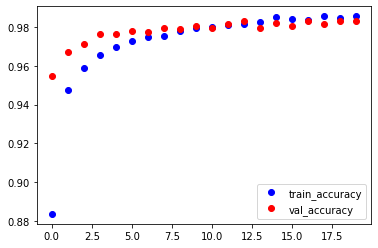

In [13]:
validation = model_2.history
accuracy = validation['accuracy']
val_accuracy = validation['val_accuracy']

x = np.arange(0,len(accuracy))
plt.plot(x,accuracy,'bo',label='train_accuracy')
plt.plot(x,val_accuracy,'ro',label='val_accuracy')
plt.legend()

##### 그래프 2. dropout을 적용한 x축(training 횟수)에 따른 train data의 정확도 변화 추이(파란색) 와 validation data의 정확도 변화 추이(빨간색)
training 횟수에 따라서 정확도가 향상되는 것을 확인할 수 있고, train data의 정확도와 validation data의 정확도가 거의 일치하는 것을 확인할 수 있다. 

In [14]:
test_loss, test_acc = smx_1.evaluate(X_test, y_test)

313/313 [==============================] - 0s 899us/step - loss: 0.1125 - accuracy: 0.9781


In [15]:
test_loss, test_acc = smx_2.evaluate(X_test, y_test)

313/313 [==============================] - 0s 873us/step - loss: 0.0629 - accuracy: 0.9821


|dropout|O|X|
|:-----:|:-----:|:-----:|
|accuracy|0.9821|0.9781|

##### 표 2. dropout 을 적용한 모델과 아닌 모델에 대한 test data에 대한 정확도
dropout을 적용한 모델에서 약간의 정확도 상승을 얻을 수 있다.

# 패션 데이터 분류

In [16]:
(X1, y1), (X1_test, y1_test) = fashion_mnist.load_data()

##### 데이터 처리

데이터 분석을 위해 3차원 형태(28x28x60000)의 Input Data 형태를 2차원 형태(784x60000)의 형태로 바꿔준다.

In [17]:
X1 = X1.reshape(60000,28*28)
X1 = X1/255
X1_test = X1_test.reshape(10000,28*28)
X1_test = X1_test/255

0~9까지의 정수 데이터 값을 가지는 60000x1 행렬로 표현되어 있는 y를 각 데이터와 일치하게 60000x10로 바꿔준다 (Softmax 분석을 위한 필수과정)

In [18]:
y1 = to_categorical(y1)
y1_test = to_categorical(y1_test)

분류 과정에서 train data에 overfitting을 방지할 수 있도록, 60000개의 데이터를 10000개의 검증 데이터와, 50000개의 트레이닝용 데이터로 나눈다

In [19]:
val_X1 = X1[:10000]
partial_X1 = X1[10000:]
val_y1 = y1[:10000]
partial_y1 = y1[10000:]

##### 데이터 분류
표 1에 따라서 multiclassification에 따른 softmax와 categorical_crossentropy를 각각 사용한다

In [28]:
smx_3 = models.Sequential()
smx_3.add(layers.Dense(512, activation = 'relu',input_shape=(28*28,)))
smx_3.add(layers.Dense(512, activation = 'relu',input_shape=(28*28,)))
smx_3.add(layers.Dense(10, activation = 'softmax',input_shape=(28*28,)))
smx_3.compile(loss = 'categorical_crossentropy', optimizer ='nadam', metrics = ['accuracy'])

In [29]:
model_3 = smx_3.fit(partial_X1,partial_y1,epochs=30,batch_size = 128, validation_data=(val_X1, val_y1))

Epoch 1/30
391/391 [==============================] - 2s 5ms/step - loss: 0.6992 - accuracy: 0.7544 - val_loss: 0.4469 - val_accuracy: 0.8305
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.3635 - accuracy: 0.8667 - val_loss: 0.3321 - val_accuracy: 0.8790
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.3124 - accuracy: 0.8835 - val_loss: 0.3330 - val_accuracy: 0.8825
Epoch 4/30
391/391 [==============================] - 2s 5ms/step - loss: 0.2805 - accuracy: 0.8949 - val_loss: 0.3057 - val_accuracy: 0.8884
Epoch 5/30
391/391 [==============================] - 2s 5ms/step - loss: 0.2645 - accuracy: 0.9009 - val_loss: 0.2970 - val_accuracy: 0.8882
Epoch 6/30
391/391 [==============================] - 2s 5ms/step - loss: 0.2481 - accuracy: 0.9064 - val_loss: 0.3286 - val_accuracy: 0.8795
Epoch 7/30
391/391 [==============================] - 2s 5ms/step - loss: 0.2290 - accuracy: 0.9133 - val_loss: 0.2951 - val_accuracy: 0.8890
Epoch 

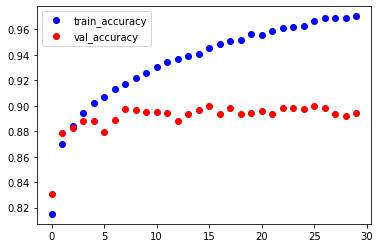

In [30]:
validation = model_3.history
accuracy = validation['accuracy']
val_accuracy = validation['val_accuracy']

x = np.arange(0,len(accuracy))
plt.plot(x,accuracy,'bo',label='train_accuracy')
plt.plot(x,val_accuracy,'ro',label='val_accuracy')
plt.legend()

##### 그래프 3. x축(training 횟수)에 따른 train data의 정확도 변화 추이(파란색) 와 validation data의 정확도 변화 추이(빨간색)
training 횟수에 따라서 정확도가 향상되는 것을 확인할 수 있으나, train data의 정확도와 validation data의 정확도의 차이로 보아 train data에 대해서 overfitting되어있는 것을 확인할 수 있다.

##### 앞선 방법과 같이 overfitting을 피하기 위해서 기존 모델에 dropout을 추가하여 인공 신경망들의 뉴런들을 확률적으로 사용하지 않는다.

In [31]:
smx_4 = models.Sequential()
smx_4.add(layers.Dense(512, activation = 'relu',input_shape=(28*28,)))
smx_4.add(layers.Dropout(0.5))
smx_4.add(layers.Dense(512, activation = 'relu',input_shape=(28*28,)))
smx_4.add(layers.Dropout(0.5))
smx_4.add(layers.Dense(10, activation = 'softmax',input_shape=(28*28,)))
smx_4.compile(loss = 'categorical_crossentropy', optimizer ='nadam', metrics = ['accuracy'])

In [32]:
model_4 = smx_4.fit(partial_X1,partial_y1,epochs=30,batch_size = 128, validation_data=(val_X1, val_y1))

Epoch 1/30
391/391 [==============================] - 3s 6ms/step - loss: 0.8544 - accuracy: 0.6955 - val_loss: 0.4181 - val_accuracy: 0.8456
Epoch 2/30
391/391 [==============================] - 2s 6ms/step - loss: 0.4639 - accuracy: 0.8313 - val_loss: 0.4192 - val_accuracy: 0.8418
Epoch 3/30
391/391 [==============================] - 2s 6ms/step - loss: 0.4229 - accuracy: 0.8455 - val_loss: 0.3509 - val_accuracy: 0.8704
Epoch 4/30
391/391 [==============================] - 2s 5ms/step - loss: 0.3903 - accuracy: 0.8584 - val_loss: 0.3508 - val_accuracy: 0.8715
Epoch 5/30
391/391 [==============================] - 2s 5ms/step - loss: 0.3779 - accuracy: 0.8590 - val_loss: 0.3296 - val_accuracy: 0.8789
Epoch 6/30
391/391 [==============================] - 2s 6ms/step - loss: 0.3635 - accuracy: 0.8679 - val_loss: 0.3397 - val_accuracy: 0.8739
Epoch 7/30
391/391 [==============================] - 2s 6ms/step - loss: 0.3592 - accuracy: 0.8675 - val_loss: 0.3217 - val_accuracy: 0.8822
Epoch 

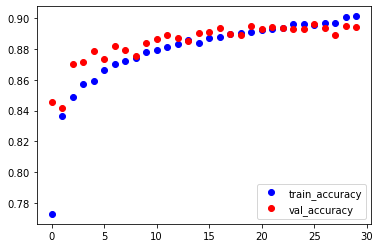

In [33]:
validation = model_4.history
accuracy = validation['accuracy']
val_accuracy = validation['val_accuracy']

x = np.arange(0,len(accuracy))
plt.plot(x,accuracy,'bo',label='train_accuracy')
plt.plot(x,val_accuracy,'ro',label='val_accuracy')
plt.legend()

##### 그래프 4. dropout을 적용한 x축(training 횟수)에 따른 train data의 정확도 변화 추이(파란색) 와 validation data의 정확도 변화 추이(빨간색)
training 횟수에 따라서 정확도가 향상되는 것을 확인할 수 있고, train data의 정확도와 validation data의 정확도가 거의 일치하는 것을 확인할 수 있다.

In [34]:
test_loss, test_acc = smx_3.evaluate(X1_test, y1_test)

313/313 [==============================] - 0s 871us/step - loss: 0.5217 - accuracy: 0.8891


In [35]:
test_loss, test_acc = smx_4.evaluate(X1_test, y1_test)

313/313 [==============================] - 0s 851us/step - loss: 0.3119 - accuracy: 0.8892


|dropout|O|X|
|:-----:|:-----:|:-----:|
|accuracy|0.8892|0.8891|

##### 표 3. dropout 을 적용한 모델과 아닌 모델에 대한 test data에 대한 정확도
dropout을 적용한 모델에서 약간의 정확도 상승을 얻을 수 있다.

## 결론

- 인공 신경망에 여러 layers을 더해주면서 분류 모델을 형성할 수 있다.
- 하지만, 모델을 train 데이터를 통해 분석할수록 train 데이터에 대해서 overfitting되는 경향이 있다.
- 이러한 경향은 dropout을 통해서 확률적으로 인공 신경망들의 뉴런들을 제외시킴으로써 피할 수 있다.

##### 의문점
- dropout을 포함한 모델은 validation data의 정확도와 비슷하게 얻어낸 것으로 보아 training data에 overfitting되지 않은 것으로 보인다. 하지만, test data를 해당 모델로 추측하였을 때, dropout을 제외한 모델로 추측한 것과 정확도 차이가 거의 없는 것을 확인할 수 있다.
- 이러한 경향은 데이터의 수가 많아서 그런 것? 아니면 데이터의 본질적인 한계?
